In [21]:
import os
from torchvision import datasets

In [22]:
dt = datasets.ImageFolder(root=r"C:\Users\vihan\projects\Dataset")

print(dt.classes)

print(len(dt.classes))

print(len(dt))

import torch
print(torch.cuda.is_available())

['beatroot', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'cheesecake', 'chicken curry', 'chicken_wings', 'dhal', 'french_fries', 'fried egg', 'fried_rice', 'ice_cream', 'kottu', 'milk rice', 'omelette', 'red_rice', 'sambol', 'white_rice']
18
9483
True


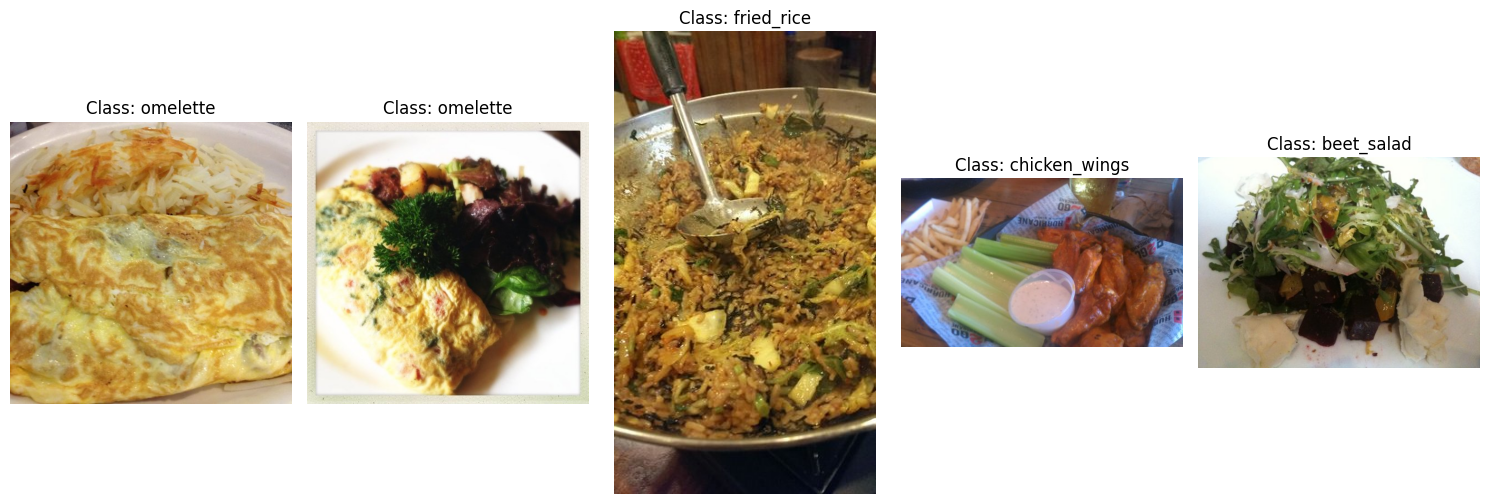

In [23]:
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Define a transform to convert images to tensors (if not already done in dataset)
transform = transforms.ToTensor()

# Pick some random indices
random_indices = random.sample(range(len(dt)), 5)  # show 5 random images

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image, label = dt[idx]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {dt.classes[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import time

In [25]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

In [26]:
# Load dataset
dataset = datasets.ImageFolder(root=r"C:\Users\vihan\projects\Dataset", transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

In [27]:
# Split into train & val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [28]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [29]:
model = models.resnet18(pretrained=True)

In [ ]:
# last layer for 18 classes
model.fc = nn.Linear(model.fc.in_features, num_classes)


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = model.to(device)

Using device: cuda


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# 8. Training loop
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / train_size
        train_acc = correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

train_model(model, criterion, optimizer, num_epochs=10)

Epoch 1/10, Loss: 1.0937, Accuracy: 0.6658
Epoch 2/10, Loss: 0.7106, Accuracy: 0.7737
Epoch 3/10, Loss: 0.5425, Accuracy: 0.8280
Epoch 4/10, Loss: 0.4512, Accuracy: 0.8555
Epoch 5/10, Loss: 0.3299, Accuracy: 0.8928
Epoch 6/10, Loss: 0.2321, Accuracy: 0.9228
Epoch 7/10, Loss: 0.2285, Accuracy: 0.9257
Epoch 8/10, Loss: 0.2147, Accuracy: 0.9309
Epoch 9/10, Loss: 0.1123, Accuracy: 0.9622
Epoch 10/10, Loss: 0.1358, Accuracy: 0.9569


In [34]:
from PIL import Image

def predict_image(img_path):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)
        print(f"Predicted Class: {class_names[pred.item()]}")

predict_image(r"C:\Users\vihan\Downloads\620701147f4cefd9d14fb91657601c31.jpg")

Predicted Class: french_fries
